# Benchmark local search algorithms

# ackley

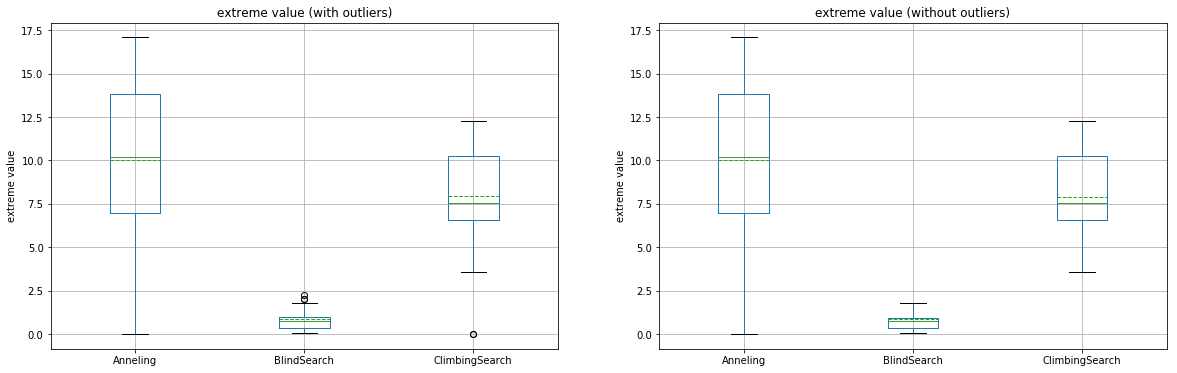

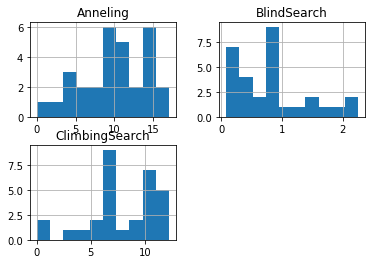

,Anneling,BlindSearch,ClimbingSearch
count,30.00000000000000000000,30.00000000000000000000,30.00000000000000000000
mean,10.00471650262393197295,0.85094684586275315397,7.92283399762645679232
std,4.29520280301530110734,0.59832907296460391411,3.22849798136089294331
min,0.00998761342777854111,0.08297969219686152087,0.00478197169953631374
25%,6.95820529373687080010,0.34363749316525993294,6.55971937053021392217
50%,10.18980174570852170746,0.75381983385834949729,7.57154035970203143080
75%,13.81946692251749908564,0.95606877997039685368,10.25825476941110103724
max,17.07757046247366261582,2.25989583972224394870,12.24439096604461063578


TypeError: can only concatenate str (not "list") to str

In [24]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import numpy as np
import scikit_posthocs as sp
from IPython.display import display, Markdown

import test_functions
import algorithms
from utils import Space, all_functions, all_algorithms

pd.set_option('precision', 20)

SAMPLES = 30
ALPHA = 0.05

space = Space(2 * [[-6, 6]])

options = {}
options[algorithms.BlindSearch.__name__] = {
    'iterations': 2000,
}
options[algorithms.ClimbingSearch.__name__] = {
    'iterations': 100,
    'population': 20,
    'sigma': 0.1,
    'start_position': None,
}
options[algorithms.Anneling.__name__] = {
    'initial_temp': 2000,
    'final_temp': 0.00000375,
    'alpha': 0.99,
    'sigma': 0.1,
    'start_position': None,
}

algos = all_algorithms()
functions = all_functions()
#functions = [test_functions.holder_table]

final = {algo.__name__: [] for algo in algos}
final['fn'] = [fn.__name__ for fn in functions]
for fn in functions:
    display(Markdown(f'# {fn.__name__}'))
    data = pd.DataFrame()
    for algo in algos:
        results = []
        for i in range(SAMPLES):
            alg = algo()
            points = list(alg.run(space, fn, options[algo.__name__]))
            results.append(fn(alg.arg))
        data[algo.__name__] = results
        final[algo.__name__].append(np.mean(results))
       
    # boxplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,6))
    ax1.set_title("extreme value (with outliers)")
    ax1.set_ylabel("extreme value")
    data.boxplot(showmeans=True, meanline=True, ax=ax1)
    
    ax2.set_title("extreme value (without outliers)")
    ax2.set_ylabel("extreme value")
    data.boxplot(showfliers=False, showmeans=True, meanline=True, ax=ax2)
    plt.show()
    
    # histograms
    data.hist()
    plt.show()
    
    display(data.describe())
        
    # data normality, kruskal test
    if (data.std() > 0.0001).all():
        columns = [data[col].values for col in data]
        display("Shapiro-wilkov: " + [scipy.stats.shapiro(col)[1] for col in columns])
        kruskal = scipy.stats.kruskal(*columns)
        display(kruskal)
        if kruskal.pvalue < ALPHA:    
            display(sp.posthoc_dunn(columns))
final = pd.DataFrame(final).set_index('fn')
display(final)